# Project: Customer Relationship Prediction
Univ.AI <br>
AI-1 Cohort-5

## Name of the people who worked on the project:

Link to presentation: *link here*

Link to slides: *link here*

Link to poster: *link here*

Any other information:*link here*

In [1]:
# Importing required libraries and modules
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading train and test data
train_data = 'data/orange_small_train.data'
test_data = 'data/orange_small_test.data'
df_train = pd.read_csv(train_data, sep = '\t')
df_test = pd.read_csv(test_data, sep = '\t')
y_train = pd.read_csv('data/orange_small_train_churn.labels', header= None).values

# Dropping columns with NaN values
df_train.dropna(axis = 1, inplace = True)

In [3]:
# Selecting the numerical variables and categorical variables with at most 10 categories
preferred_unique_count = 10
fe_unique_columns = list(df_train.select_dtypes(include='number').columns) + list(
    (df_train.select_dtypes(include='object').nunique() < preferred_unique_count).index[
        df_train.select_dtypes(include='object').nunique() < preferred_unique_count])

In [4]:
# Performing one hot encoding
cat = ['Var196', 'Var210', 'Var211', 'Var221', 'Var227']
X_train = df_train[fe_unique_columns]
X_test = df_test[fe_unique_columns]
X_train = pd.get_dummies(X_train, cat)
X_test = pd.get_dummies(X_test, cat)

In [5]:
# Making sure that the test and train data has the same columns
X_test = X_test[X_train.columns]

In [6]:
# Train validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = 0.85, stratify= y_train)

In [7]:

forest = RandomForestClassifier(n_estimators = 1000, max_depth = 1, class_weight = 'balanced_subsample')
forest.fit(X_train, y_train)
result = permutation_importance(forest, X_train, y_train)

C:\Users\matho\AppData\Local\Temp\ipykernel_10920\361649312.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


In [ ]:
y_pred_train = forest.predict(X_train)
f1_train = f1_score(y_train, y_pred_train)
f1_train

0.15717187015937487

In [ ]:
y_pred_val = forest.predict(X_val)
f1_val = f1_score(y_val, y_pred_val)
f1_val

0.16324936535832846

In [ ]:
auc_train = roc_auc_score(y_train, y_pred_train)
auc_train

0.5654992940342749

In [ ]:
auc_val = roc_auc_score(y_val, y_pred_val)
auc_val

0.5805623235295576

<AxesSubplot: >

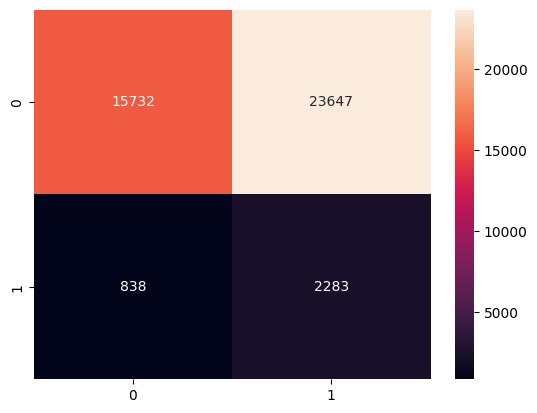

In [ ]:
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot = True, fmt='d')

<AxesSubplot: >

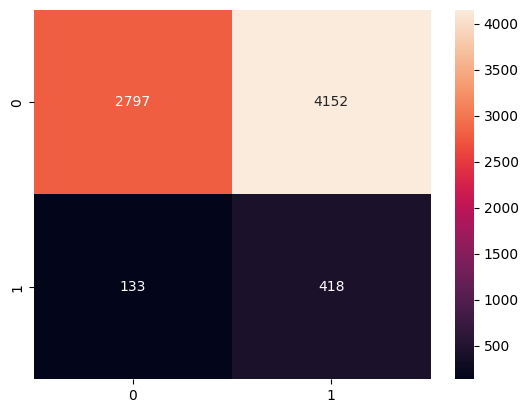

In [ ]:
cm_val = confusion_matrix(y_val, y_pred_val)
sns.heatmap(cm_val, annot = True, fmt='d')

In [ ]:
importances = forest.feature_importances_
indices = np.argsort(importances)
indices

array([28,  5,  6, 20, 15, 23,  4,  8, 27,  9,  3,  7, 22, 16, 26,  0, 11,
       17, 21, 14, 13, 18, 12, 10, 19, 25,  2, 24,  1], dtype=int64)

In [ ]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

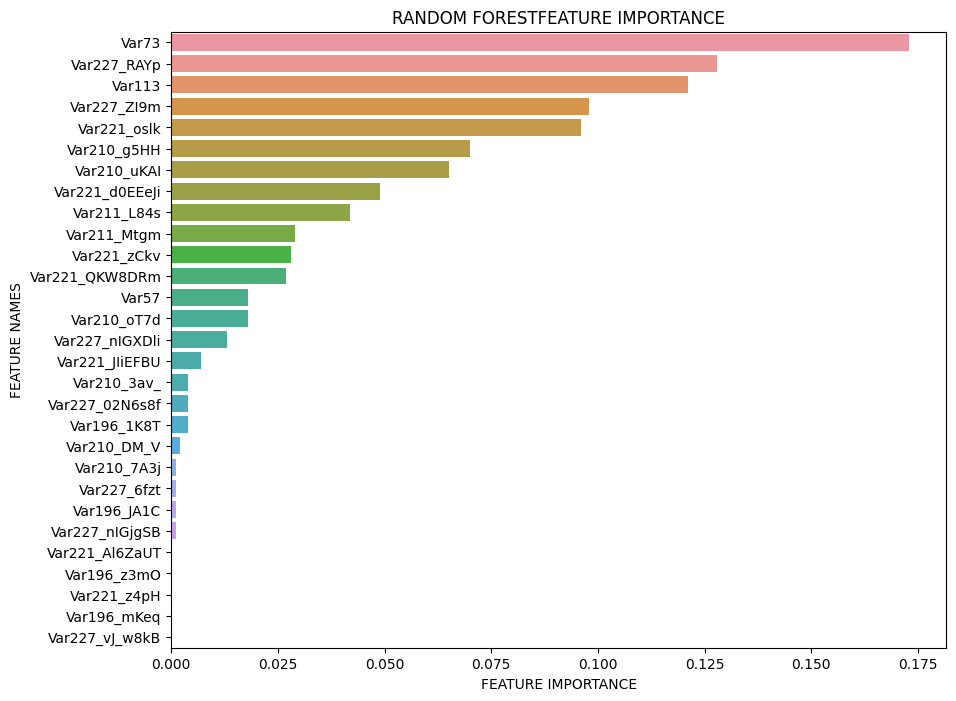

In [ ]:
plot_feature_importance(forest.feature_importances_,X_train.columns,'RANDOM FOREST')